 <div style="text-align:center; margin-top: 50px;">
        <img src="musical-note.png" alt="Music Icon" style="width: 200px; height: 200px;">

# <p style="background-color:chocolate;font-family:newtimeroman;font-size:180%;color:white;text-align:center;border-radius:10px 10px;"><b> Music Recommendation System
  
## Before we start,

I wanted to make this notebook to test my ability to use machine learning Enjoy!


## Content:

- About Dataset
- Importing Libraries
- Read Data
- Preprocessing Data
- Exploratory Data Analysis (EDA)
- Building Similarity Matrix
- Recommendation Function
# About Dataset
The dataset contains information about various songs, including their names, artists, genres, albums, and user ratings.


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden;padding:10px;text-align:center;margin:0"><p style="font-size:130%;letter-spacing:0.5px;margin:0"><b>1) About the Music Dataset</b></p></div>

The music dataset is designed to assist in building and evaluating music recommendation systems. It includes various features related to songs, artists, and genres. Here’s an overview of the dataset:

## Dataset Overview

- **Time Period**: The dataset covers a broad range of music data, typically spanning several years to provide diverse examples of music trends.

- **Data Columns**:
  - **Song-Name**: The title of the song.
  - **Album/Movie**: The album or movie from which the song originates.
  - **Singer/Artists**: The performer(s) of the song.
  - **Genre**: The genre or category of the music.
  - **User-Rating**: Ratings given by users, often on a scale (e.g., 1-5).

## Example Records

Here are a few examples of records in the dataset:

| Song-Name        | Album/Movie     | Singer/Artists | Genre       | User-Rating |
|------------------|-----------------|----------------|-------------|-------------|
| Shape of You     | ÷               | Ed Sheeran     | Pop         | 4.5         |
| Blinding Lights  | After Hours     | The Weeknd     | Synthwave   | 4.7         |
| Rolling in the Deep | 21            | Adele          | Soul        | 4.8         |
| Bad Guy          | When We All Fall Asleep, Where Do We Go? | Billie Eilish | Electropop  | 4.6         |
| Dance Monkey     | The Kids Are Coming | Tones and I | Indie Pop   | 4.5         |

## Key Insights

- **Popular Genres**: By analyzing the genres, you can identify popular music styles and trends.
- **Artist Popularity**: Evaluating ratings and frequency of songs by artists can help gauge their popularity.
- **Album Influence**: The impact of albums on song ratings and popularity can be assessed.

## Applications

This dataset can be used for:

- **Music Recommendation Systems**: To suggest songs based on user preferences and ratings.
- **Trend Analysis**: To identify trends in music genres and artist popularity over time.
- **Sentiment Analysis**: To analyze user ratings and feedback for insights into music preferences.

This dataset provides a comprehensive foundation for exploring music data and developing predictive models for music recommendations.


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 2) Import Libraries</p></div> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\KIMO STORE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b>3) Read Data</b></p></div>

In [2]:
df=pd.read_csv(r"A:\in\training\music recomendation system\ex.csv")
df

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2/10
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,7.2/10
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,7.5/10
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,6.5/10


<div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b>4) Preprocessing Data</b></p></div>

In [3]:
df.isnull().sum()

Song-Name          0
Singer/Artists    10
Genre              0
Album/Movie        3
User-Rating        0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Song-Name         0
Singer/Artists    0
Genre             0
Album/Movie       0
User-Rating       0
dtype: int64

In [6]:
df.duplicated().sum()

16

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(2391, 5)

In [10]:
df.head()

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10


In [11]:
df['User-Rating']

0       8.8/10
1       9.0/10
2       9.7/10
3       9.1/10
4       9.2/10
         ...  
2415    6.2/10
2416    7.2/10
2417    7.5/10
2418    6.5/10
2419    6.6/10
Name: User-Rating, Length: 2391, dtype: object

In [12]:
l=[]
for i in df['User-Rating']:
    l.append(i[:3])
l

['8.8',
 '9.0',
 '9.7',
 '9.1',
 '9.2',
 '9.1',
 '9.2',
 '9.5',
 '9.2',
 '9.6',
 '8.8',
 '8.4',
 '9.1',
 '9.2',
 '9.0',
 '9.7',
 '9.1',
 '9.0',
 '9.0',
 '9.1',
 '9.2',
 '9.2',
 '9.5',
 '8.6',
 '9.1',
 '9.0',
 '9.0',
 '9.2',
 '9.5',
 '9.4',
 '8.7',
 '9.3',
 '9.3',
 '9.5',
 '9.1',
 '9.0',
 '9.0',
 '9.1',
 '8.4',
 '8.4',
 '8.8',
 '9.2',
 '9.2',
 '9.6',
 '9.6',
 '9.0',
 '9.1',
 '8.5',
 '9.5',
 '8.5',
 '9.7',
 '8.9',
 '9.6',
 '8.5',
 '9.1',
 '8.7',
 '8.6',
 '9.3',
 '9.7',
 '8.9',
 '9.0',
 '9.0',
 '9.3',
 '9.3',
 '9.1',
 '9.0',
 '9.7',
 '9.2',
 '9.1',
 '9.0',
 '8.9',
 '9.5',
 '9.5',
 '9.7',
 '9.0',
 '8.1',
 '8.1',
 '9.5',
 '9.1',
 '8.6',
 '9.4',
 '9.0',
 '9.0',
 '9.6',
 '9.3',
 '9.0',
 '9.2',
 '9.3',
 '9.1',
 '8.6',
 '9.5',
 '9.5',
 '9.0',
 '9.4',
 '9.2',
 '9.6',
 '9.3',
 '7.7',
 '9.2',
 '9.3',
 '7.7',
 '9.0',
 '9.5',
 '9.4',
 '9.0',
 '9.2',
 '9.0',
 '9.4',
 '9.4',
 '9.1',
 '9.3',
 '9.2',
 '9.1',
 '9.0',
 '9.8',
 '8.9',
 '6.8',
 '8.9',
 '8.2',
 '8.7',
 '8.2',
 '9.4',
 '9.0',
 '8.9',
 '9.9',


In [13]:
df['User-Rating']=l
df

C:\Users\KIMO STORE\AppData\Local\Temp\ipykernel_13944\4109083967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User-Rating']=l


,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,7.2
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,7.5
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,6.5


In [14]:
df['Album/Movie']=df['Album/Movie'].str.replace(' ','')
df['Singer/Artists']=df['Singer/Artists'].str.replace(' ','')
df

C:\Users\KIMO STORE\AppData\Local\Temp\ipykernel_13944\3143610327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Album/Movie']=df['Album/Movie'].str.replace(' ','')
C:\Users\KIMO STORE\AppData\Local\Temp\ipykernel_13944\3143610327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Singer/Artists']=df['Singer/Artists'].str.replace(' ','')


,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"KumarSanu,MikaSingh,NehaKakkar",BollywoodDance,Simmba,8.8
1,Coca Cola,"NehaKakkar,TonyKakkar",BollywoodDanceRomantic,LukaChuppi,9.0
2,Apna Time Aayega,RanveerSingh,BollywoodDance,GullyBoy,9.7
3,Mungda,"JyoticaTangri,Shaan,SubhroGanguly",BollywoodDance,TotalDhamaal,9.1
4,Tere Bin,"AseesKaur,RahatFatehAliKhan,TanishkBagchi",BollywoodRomantic,Simmba,9.2
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2
2416,Tum Jaise Bigde Babu Se,LataMangeshkar,BollywoodDance,JabPyarKisiSeHotaHai,7.2
2417,O Yaad Nahi Bhool Gaya,"LataMangeshkar,SureshWadkar",BollywoodDance,Lamhe,7.5
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,JagjitKaur,BollywoodDance,SholaAurShabnam,6.5


In [15]:
df['Singer/Artists']=df['Singer/Artists'].str.replace(',',' ')
df

C:\Users\KIMO STORE\AppData\Local\Temp\ipykernel_13944\1991446236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Singer/Artists']=df['Singer/Artists'].str.replace(',',' ')


,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,KumarSanu MikaSingh NehaKakkar,BollywoodDance,Simmba,8.8
1,Coca Cola,NehaKakkar TonyKakkar,BollywoodDanceRomantic,LukaChuppi,9.0
2,Apna Time Aayega,RanveerSingh,BollywoodDance,GullyBoy,9.7
3,Mungda,JyoticaTangri Shaan SubhroGanguly,BollywoodDance,TotalDhamaal,9.1
4,Tere Bin,AseesKaur RahatFatehAliKhan TanishkBagchi,BollywoodRomantic,Simmba,9.2
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2
2416,Tum Jaise Bigde Babu Se,LataMangeshkar,BollywoodDance,JabPyarKisiSeHotaHai,7.2
2417,O Yaad Nahi Bhool Gaya,LataMangeshkar SureshWadkar,BollywoodDance,Lamhe,7.5
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,JagjitKaur,BollywoodDance,SholaAurShabnam,6.5


In [16]:
df['tags']=df['Singer/Artists']+' '+df['Genre']+' '+df['Album/Movie']+' '+df['User-Rating']
df['tags'][0]

C:\Users\KIMO STORE\AppData\Local\Temp\ipykernel_13944\519945713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags']=df['Singer/Artists']+' '+df['Genre']+' '+df['Album/Movie']+' '+df['User-Rating']


'KumarSanu MikaSingh NehaKakkar BollywoodDance Simmba 8.8'

In [17]:
new_df=df[['Song-Name','tags']]
new_df

,Song-Name,tags
0,Aankh Marey,KumarSanu MikaSingh NehaKakkar BollywoodDance ...
1,Coca Cola,NehaKakkar TonyKakkar BollywoodDanceRomantic L...
2,Apna Time Aayega,RanveerSingh BollywoodDance GullyBoy 9.7
3,Mungda,JyoticaTangri Shaan SubhroGanguly BollywoodDan...
4,Tere Bin,AseesKaur RahatFatehAliKhan TanishkBagchi Boll...
...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh BollywoodDance Sasural 6.2
2416,Tum Jaise Bigde Babu Se,LataMangeshkar BollywoodDance JabPyarKisiSeHot...
2417,O Yaad Nahi Bhool Gaya,LataMangeshkar SureshWadkar BollywoodDance Lam...
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,JagjitKaur BollywoodDance SholaAurShabnam 6.5


In [18]:
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())
new_df

C:\Users\KIMO STORE\AppData\Local\Temp\ipykernel_13944\2565169282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


,Song-Name,tags
0,Aankh Marey,kumarsanu mikasingh nehakakkar bollywooddance ...
1,Coca Cola,nehakakkar tonykakkar bollywooddanceromantic l...
2,Apna Time Aayega,ranveersingh bollywooddance gullyboy 9.7
3,Mungda,jyoticatangri shaan subhroganguly bollywooddan...
4,Tere Bin,aseeskaur rahatfatehalikhan tanishkbagchi boll...
...,...,...
2415,Jana Tumhare Pyar Mein,mukesh bollywooddance sasural 6.2
2416,Tum Jaise Bigde Babu Se,latamangeshkar bollywooddance jabpyarkisisehot...
2417,O Yaad Nahi Bhool Gaya,latamangeshkar sureshwadkar bollywooddance lam...
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,jagjitkaur bollywooddance sholaaurshabnam 6.5


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b>4) Exploratory Data Analysis (EDA)</b></p></div>


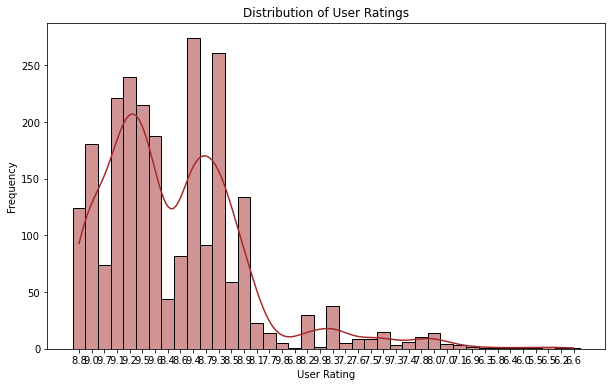

In [19]:


# Distribution of User Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['User-Rating'], bins=20, kde=True, color='brown')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()





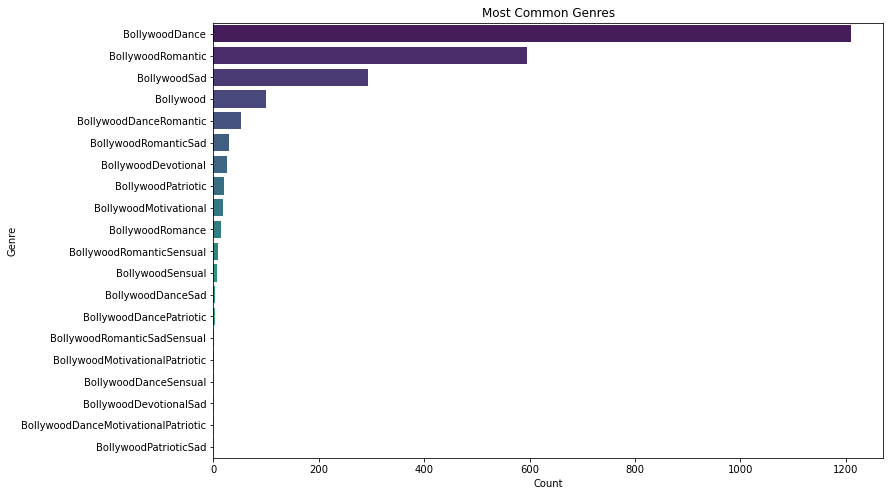

In [20]:

# Most common genres
plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

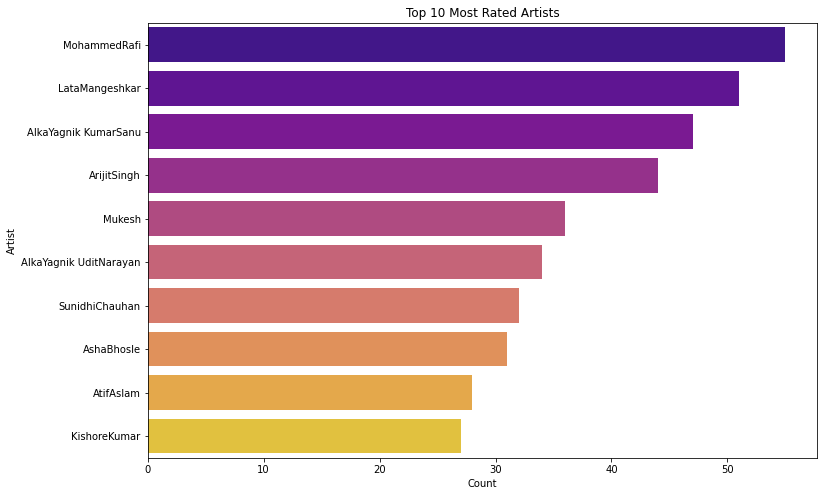

In [21]:

# Most rated artists
plt.figure(figsize=(12, 8))
sns.countplot(y='Singer/Artists', data=df, order=df['Singer/Artists'].value_counts().head(10).index, palette='plasma')
plt.title('Top 10 Most Rated Artists')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

<div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b>5) Building Similarity Matrix</b></p></div>

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2000)

In [23]:
vectors=cv.fit_transform(new_df['tags']).toarray()

In [24]:
vectors.shape

(2391, 1697)

In [25]:
cv.get_feature_names()

C:\Users\KIMO STORE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['13',
 '1920',
 '1921',
 '1947',
 '2states',
 '3dev',
 '3idiots',
 '3storeys',
 '55',
 '7ekterasaath',
 '7khoonmaaf',
 '7welcometolondon',
 '9211',
 'aadesh',
 'aagalelagjaa',
 'aah',
 'aajamerijaan',
 'aajanachle',
 'aakankshasharma',
 'aakhirkyon',
 'aakhreeraasta',
 'aamantrikha',
 'aamir',
 'aan',
 'aanchalsethi',
 'aandhi',
 'aaniya',
 'aankhen',
 'aapkaasurroor',
 'aapkikasam',
 'aapkikhatir',
 'aapsemausiiquii',
 'aaryandineshkanagaratnam',
 'aashayein',
 'aashiqbanayaaapne',
 'aashiqui',
 'aashiqui2',
 'aashqui2',
 'aaskapanchhi',
 'aasthagill',
 'aazaan',
 'abcd',
 'abcd2',
 'abhaydeol',
 'abhayjodhpurkar',
 'abhijeet',
 'abhijeetsawant',
 'abhijitvaghani',
 'abhimaan',
 'abhisheknailwal',
 'abhisheknehwal',
 'actionjackson',
 'actionreplayy',
 'actorinlaw',
 'aditipaul',
 'aditisinghsharma',
 'aditsinghsharma',
 'adityan',
 'adityanarayan',
 'adnansami',
 'aedilhaimushkil',
 'aflyingjatt',
 'agentleman',
 'agentvinod',
 'agneepath',
 'ahmedhussain',
 'airlift',
 'aisha',
 'a

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

In [27]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])

[(0, 0.9999999999999999),
 (5, 0.5163977794943223),
 (34, 0.5163977794943223),
 (184, 0.5163977794943223),
 (269, 0.5163977794943223),
 (371, 0.5163977794943223),
 (465, 0.5163977794943223),
 (540, 0.5163977794943223),
 (587, 0.5163977794943223),
 (606, 0.5163977794943223),
 (820, 0.5163977794943223),
 (919, 0.5163977794943223),
 (1388, 0.5163977794943223),
 (1600, 0.5163977794943223),
 (1931, 0.5163977794943223),
 (2145, 0.5163977794943223),
 (2272, 0.5163977794943223),
 (2358, 0.5163977794943223),
 (11, 0.4472135954999579),
 (35, 0.4472135954999579),
 (40, 0.4472135954999579),
 (88, 0.4472135954999579),
 (115, 0.4472135954999579),
 (117, 0.4472135954999579),
 (136, 0.4472135954999579),
 (142, 0.4472135954999579),
 (241, 0.4472135954999579),
 (262, 0.4472135954999579),
 (302, 0.4472135954999579),
 (309, 0.4472135954999579),
 (343, 0.4472135954999579),
 (363, 0.4472135954999579),
 (375, 0.4472135954999579),
 (386, 0.4472135954999579),
 (406, 0.4472135954999579),
 (496, 0.44721359549995

In [28]:
new_df.rename(columns={'Song-Name':'title'},inplace=True)

C:\Users\KIMO STORE\AppData\Local\Temp\ipykernel_13944\3387547346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'Song-Name':'title'},inplace=True)


In [29]:
def recommend(music):
    music_index=new_df[new_df['title']==music].index[0]
    distances=similarity[music_index]
    music_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    for i in music_list:
        print(new_df.iloc[i[0]].title)

In [35]:
recommend('Proper Patola')

Abhi Toh Party Shuru Hui Hai
Bhare Bazaar
Tareefan Remix
Pant Mein Gun
Pee Paa Pee Paa


# let's see the tags for last time

In [31]:
df.head(50)

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating,tags
0,Aankh Marey,KumarSanu MikaSingh NehaKakkar,BollywoodDance,Simmba,8.8,KumarSanu MikaSingh NehaKakkar BollywoodDance ...
1,Coca Cola,NehaKakkar TonyKakkar,BollywoodDanceRomantic,LukaChuppi,9.0,NehaKakkar TonyKakkar BollywoodDanceRomantic L...
2,Apna Time Aayega,RanveerSingh,BollywoodDance,GullyBoy,9.7,RanveerSingh BollywoodDance GullyBoy 9.7
3,Mungda,JyoticaTangri Shaan SubhroGanguly,BollywoodDance,TotalDhamaal,9.1,JyoticaTangri Shaan SubhroGanguly BollywoodDan...
4,Tere Bin,AseesKaur RahatFatehAliKhan TanishkBagchi,BollywoodRomantic,Simmba,9.2,AseesKaur RahatFatehAliKhan TanishkBagchi Boll...
5,Gali Gali,NehaKakkar,BollywoodDance,KGF,9.1,NehaKakkar BollywoodDance KGF 9.1
6,Chamma Chamma,Arun Ikka NehaKakkar Romy,BollywoodDance,FraudSaiyaan,9.2,Arun Ikka NehaKakkar Romy BollywoodDance Fraud...
7,Mere Gully Mein,RanveerSingh,BollywoodDance,GullyBoy,9.5,RanveerSingh BollywoodDance GullyBoy 9.5
8,Kamariya,DarshanRaval,BollywoodDance,Mitron,9.2,DarshanRaval BollywoodDance Mitron 9.2
9,Ek Ladki Ko Dekha Toh Aisa Laga,DarshanRaval RochakKohli,BollywoodRomantic,EkLadkiKoDekhaTohAisaLaga,9.6,DarshanRaval RochakKohli BollywoodRomantic EkL...


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden;padding:10px;text-align:center;margin:0"><p style="font-size:130%;letter-spacing:0.5px;margin:0;animation:fadeIn 3s ease-in-out;animation: pulse 2s infinite;"><b>Thank you for your time</b></p></div>

<style>
@keyframes fadeIn {
    from {
        opacity: 0;
    }
    to {
        opacity: 1;
    }
}

@keyframes pulse {
    0% {
        transform: scale(1);
        opacity: 1;
    }
    50% {
        transform: scale(1.1);
        opacity: 0.8;
    }
    100% {
        transform: scale(1);
        opacity: 1;
    }
}
</style>
